In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_all_rpv = pd.read_csv("/run/media/mak/Heim/RPV_Results/V10/rpv_results.csv")


df_all_rpv = df_all_rpv[df_all_rpv["status"] == "success"]


grouped = df_all_rpv.drop(["processed_at", "status", "cultivar"],axis=1).groupby(by=["week", "band","treatment"]).mean().reset_index()

grouped["treatment"] = grouped["treatment"].map({"no_trt": 0, "trt": 1}).astype("int64")

grouped = grouped.drop(["rc","plot_id","Unnamed: 0"],axis=1)
grouped

,week,band,treatment,index,rho0,k,theta,rmse,nrmse
0,week0,band1,0,17.5,0.099834,1.409268,-0.136189,0.024292,0.431722
1,week0,band1,1,5.5,0.078457,1.090119,-0.137922,0.023301,0.424465
2,week0,band2,0,17.5,0.268643,1.735271,-0.106938,0.034878,0.329461
3,week0,band2,1,5.5,0.151903,1.130101,-0.137840,0.033892,0.337816
4,week0,band3,0,17.5,0.292374,1.830951,-0.115683,0.054561,0.510414
5,week0,band3,1,5.5,0.163965,1.167739,-0.145417,0.051869,0.495961
6,week0,band4,0,17.5,0.593306,1.886721,-0.083342,0.064828,0.332480
7,week0,band4,1,5.5,0.254583,1.007436,-0.135403,0.063291,0.341312
8,week0,band5,0,17.5,1.014594,1.941042,-0.073399,0.125002,0.404965
9,week0,band5,1,5.5,0.483469,1.195582,-0.123113,0.121254,0.424595


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Assume 'grouped' DataFrame is already created as per your script ---
# It has columns: ['week', 'band', 'treatment', 'index', 'rho0', 'k', 'theta', 'rmse', 'nrmse']
# and 'treatment' is mapped to 0 (no_trt) and 1 (trt).
# -------------------------------------------------------------------------


# --- Data Preparation ---
# Create a new DataFrame that averages the treatment values for the simplified plots
grouped_avg = grouped.groupby(['week', 'band',"treatment"]).mean().reset_index()

# Define parameters and order weeks for consistent plotting
parameters_to_plot = ['rho0', 'k', 'theta','nrmse']
week_order = sorted(grouped['week'].unique(), key=lambda w: int(w.replace('week', '')))
grouped['week'] = pd.Categorical(grouped['week'], categories=week_order, ordered=True)
grouped_avg['week'] = pd.Categorical(grouped_avg['week'], categories=week_order, ordered=True)
grouped_avg

,week,band,treatment,index,rho0,k,theta,rmse,nrmse
0,week0,band1,0,17.5,0.099834,1.409268,-0.136189,0.024292,0.431722
1,week0,band1,1,5.5,0.078457,1.090119,-0.137922,0.023301,0.424465
2,week0,band2,0,17.5,0.268643,1.735271,-0.106938,0.034878,0.329461
3,week0,band2,1,5.5,0.151903,1.130101,-0.137840,0.033892,0.337816
4,week0,band3,0,17.5,0.292374,1.830951,-0.115683,0.054561,0.510414
5,week0,band3,1,5.5,0.163965,1.167739,-0.145417,0.051869,0.495961
6,week0,band4,0,17.5,0.593306,1.886721,-0.083342,0.064828,0.332480
7,week0,band4,1,5.5,0.254583,1.007436,-0.135403,0.063291,0.341312
8,week0,band5,0,17.5,1.014594,1.941042,-0.073399,0.125002,0.404965
9,week0,band5,1,5.5,0.483469,1.195582,-0.123113,0.121254,0.424595


Generating simplified parameter evolution plots (one band per subplot, fixed band colors)...


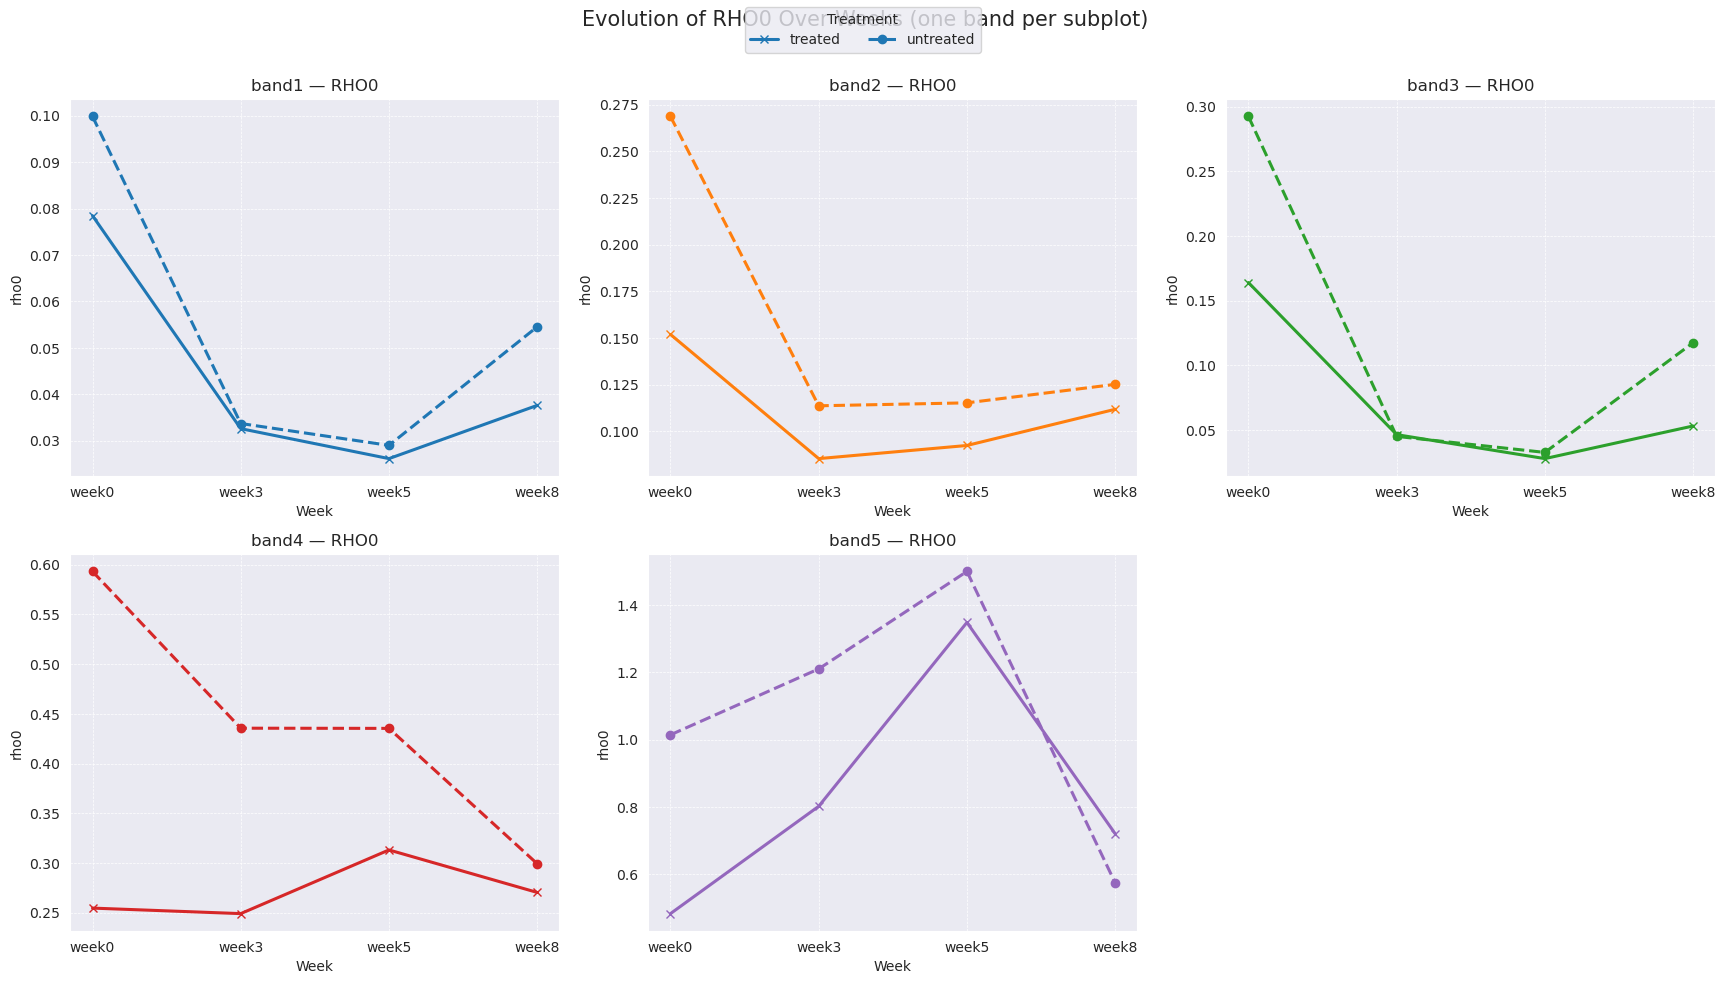

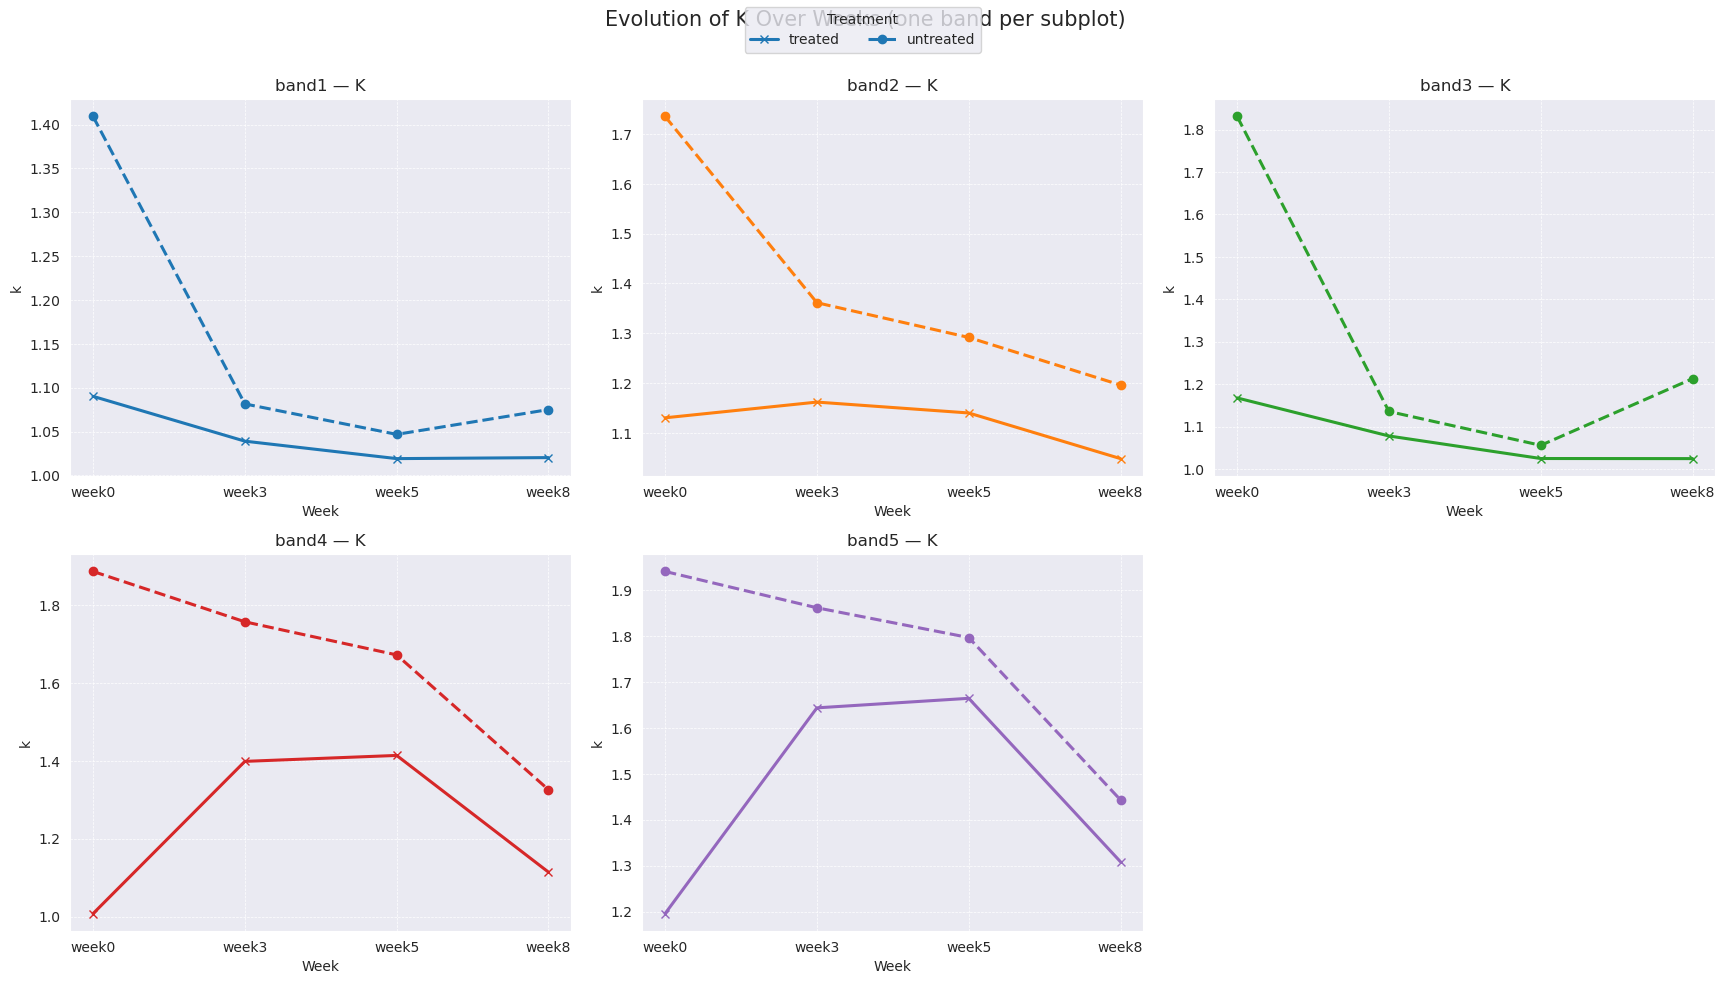

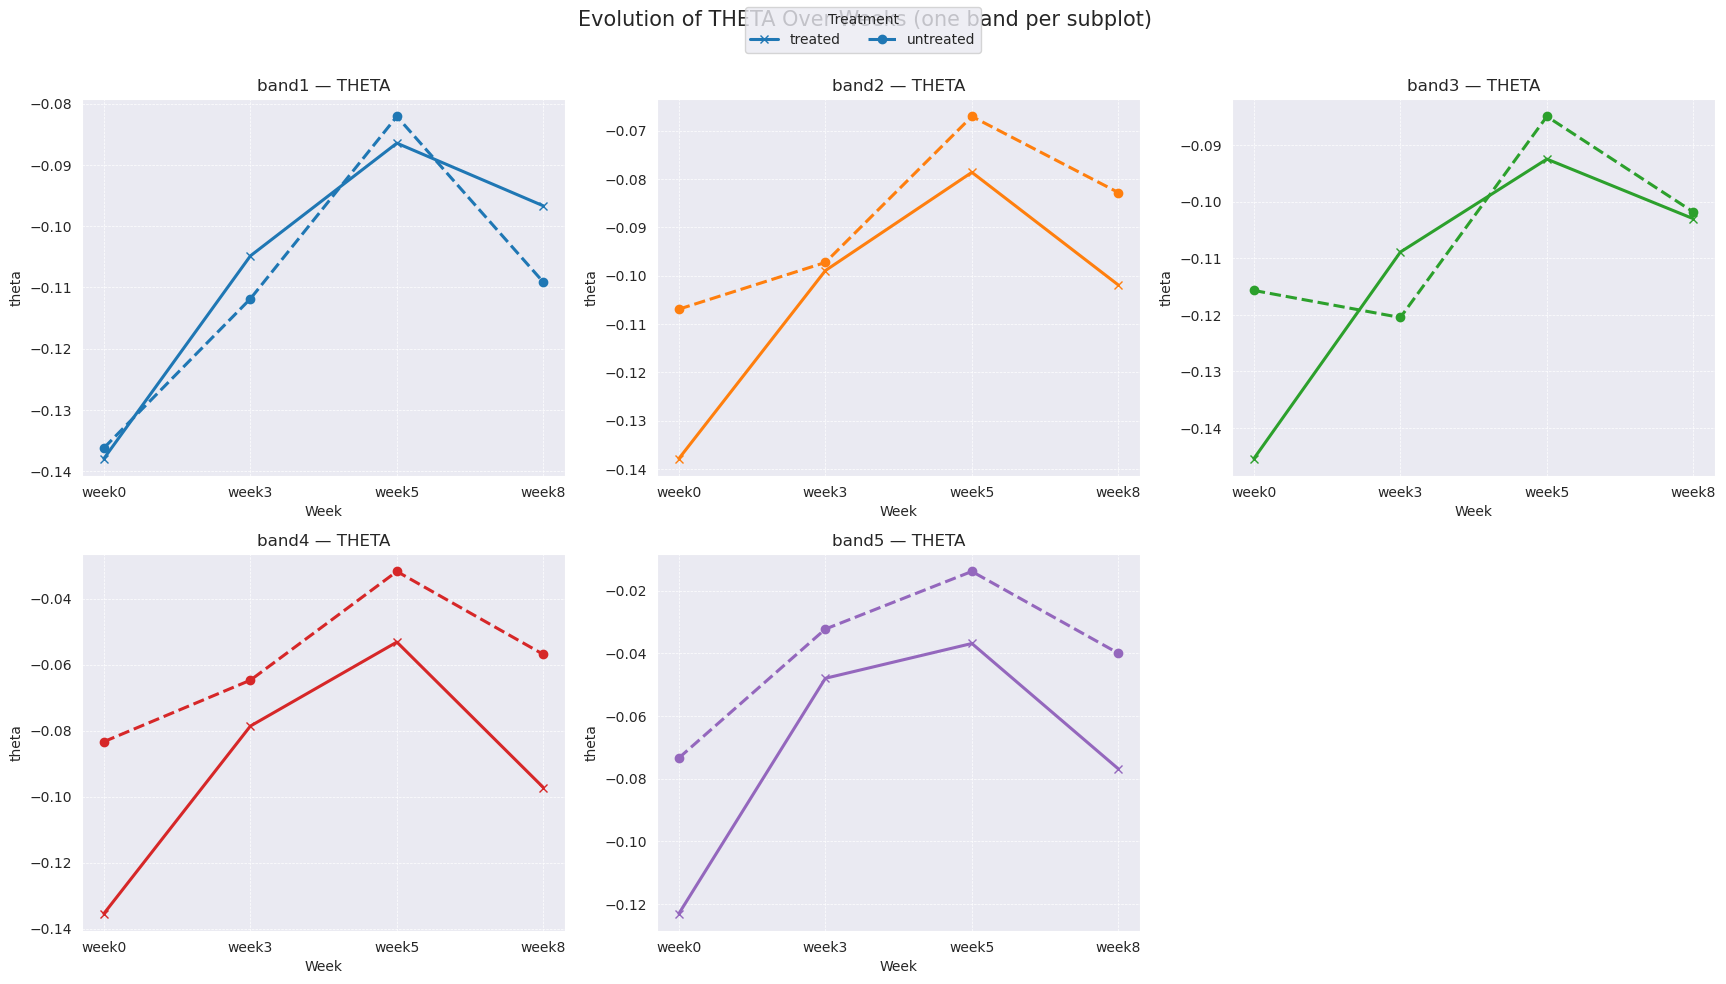

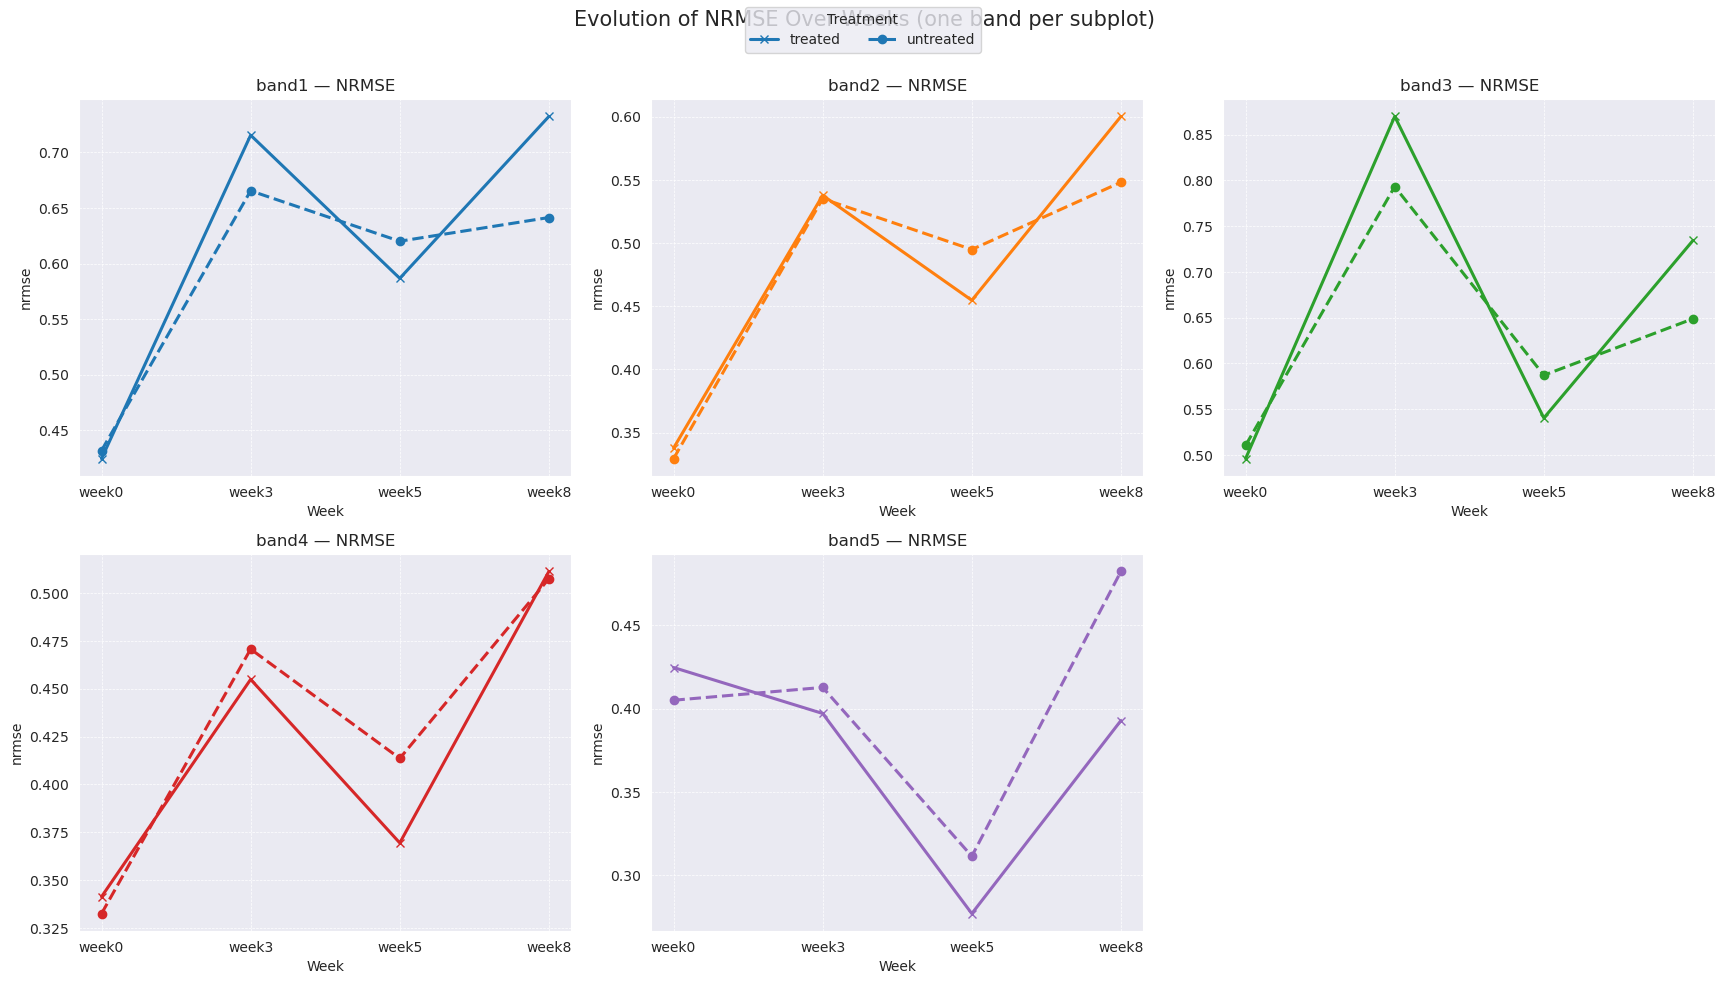

In [8]:
# --- 1. Visualization: Simplified Parameter Evolution Over Weeks (one band per subplot, fixed band colors) ---
print("Generating simplified parameter evolution plots (one band per subplot, fixed band colors)...")

# Bands and colors: one color per band, consistent across treatments
bands = list(grouped_avg['band'].unique())
n_bands = len(bands)
palette = sns.color_palette("tab10", n_bands)
band_colors = {b: palette[i] for i, b in enumerate(bands)}

def best_grid(n, max_cols=3):
    ncols = min(max_cols, n) if n > 0 else 1
    nrows = int(np.ceil(n / ncols))
    return nrows, ncols

# Line/marker styles per treatment (color comes from band_colors)
trt_styles = {
    1: dict(label="treated", linestyle='-', marker='x'),
    0: dict(label="untreated", linestyle='--', marker='o')
}

for param in parameters_to_plot:
    nrows, ncols = best_grid(n_bands, max_cols=3)
    # Bigger figure size
    fig, axes = plt.subplots(nrows, ncols, figsize=(5.8 * ncols, 4.8 * nrows), squeeze=False)
    axes_flat = axes.ravel()

    for i, band in enumerate(bands):
        ax = axes_flat[i]
        color = band_colors[band]

        for trt in [1, 0]:
            df_plot = grouped_avg[(grouped_avg['band'] == band) & (grouped_avg['treatment'] == trt)].copy()
            df_plot = df_plot.sort_values('week')

            ax.plot(
                df_plot['week'].astype(str),
                df_plot[param],
                color=color,
                linewidth=2.2,
                **trt_styles[trt]
            )

        ax.set_title(f"{band} — {param.upper()}", fontsize=12)
        ax.set_xlabel("Week", fontsize=10)
        ax.set_ylabel(f"{param}", fontsize=10)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Hide any unused axes
    for j in range(i + 1, len(axes_flat)):
        axes_flat[j].set_visible(False)

    # Shared legend
    handles, labels = axes_flat[0].get_legend_handles_labels()
    fig.legend(handles, labels, title="Treatment", loc="upper center", ncol=2, frameon=True)

    fig.suptitle(f"Evolution of {param.upper()} Over Weeks (one band per subplot)", fontsize=15, y=1.02)
    fig.tight_layout()
    plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_all_rpv = pd.read_csv("/run/media/mak/Heim/RPV_Results/V10_ndvi_2/rpv_results.csv")


df_all_rpv = df_all_rpv[df_all_rpv["status"] == "success"]


grouped = df_all_rpv.drop(["processed_at", "status", "cultivar"],axis=1).groupby(by=["week", "band","treatment"]).mean().reset_index()

grouped["treatment"] = grouped["treatment"].map({"no_trt": 0, "trt": 1}).astype("int64")

grouped = grouped.drop(["rc","plot_id","Unnamed: 0"],axis=1)
grouped

,week,band,treatment,index,rho0,k,theta,rmse,nrmse
0,week0,band1,0,17.5,0.096830,1.653743,-0.074195,0.013504,0.353955
1,week0,band1,1,5.5,0.064497,1.242128,-0.105925,0.013568,0.367555
2,week0,band2,0,17.5,0.365266,1.946363,-0.062902,0.032111,0.304742
3,week0,band2,1,5.5,0.217236,1.391388,-0.107420,0.032579,0.318630
4,week0,band3,0,17.5,0.176281,1.834809,-0.063968,0.020113,0.353643
5,week0,band3,1,5.5,0.104378,1.285180,-0.107856,0.020547,0.370291
6,week0,band4,0,17.5,0.828025,1.991403,-0.059338,0.065382,0.285033
7,week0,band4,1,5.5,0.427994,1.311869,-0.114871,0.067757,0.300588
8,week0,band5,0,17.5,1.586914,2.014049,-0.059712,0.118659,0.275108
9,week0,band5,1,5.5,1.059944,1.541855,-0.096138,0.124862,0.299882


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Assume 'grouped' DataFrame is already created as per your script ---
# It has columns: ['week', 'band', 'treatment', 'index', 'rho0', 'k', 'theta', 'rmse', 'nrmse']
# and 'treatment' is mapped to 0 (no_trt) and 1 (trt).
# -------------------------------------------------------------------------


# --- Data Preparation ---
# Create a new DataFrame that averages the treatment values for the simplified plots
grouped_avg = grouped.groupby(['week', 'band',"treatment"]).mean().reset_index()

# Define parameters and order weeks for consistent plotting
parameters_to_plot = ['rho0', 'k', 'theta','nrmse']
week_order = sorted(grouped['week'].unique(), key=lambda w: int(w.replace('week', '')))
grouped['week'] = pd.Categorical(grouped['week'], categories=week_order, ordered=True)
grouped_avg['week'] = pd.Categorical(grouped_avg['week'], categories=week_order, ordered=True)
grouped_avg

,week,band,treatment,index,rho0,k,theta,rmse,nrmse
0,week0,band1,0,17.5,0.096830,1.653743,-0.074195,0.013504,0.353955
1,week0,band1,1,5.5,0.064497,1.242128,-0.105925,0.013568,0.367555
2,week0,band2,0,17.5,0.365266,1.946363,-0.062902,0.032111,0.304742
3,week0,band2,1,5.5,0.217236,1.391388,-0.107420,0.032579,0.318630
4,week0,band3,0,17.5,0.176281,1.834809,-0.063968,0.020113,0.353643
5,week0,band3,1,5.5,0.104378,1.285180,-0.107856,0.020547,0.370291
6,week0,band4,0,17.5,0.828025,1.991403,-0.059338,0.065382,0.285033
7,week0,band4,1,5.5,0.427994,1.311869,-0.114871,0.067757,0.300588
8,week0,band5,0,17.5,1.586914,2.014049,-0.059712,0.118659,0.275108
9,week0,band5,1,5.5,1.059944,1.541855,-0.096138,0.124862,0.299882


Generating simplified parameter evolution plots (one band per subplot, fixed band colors)...


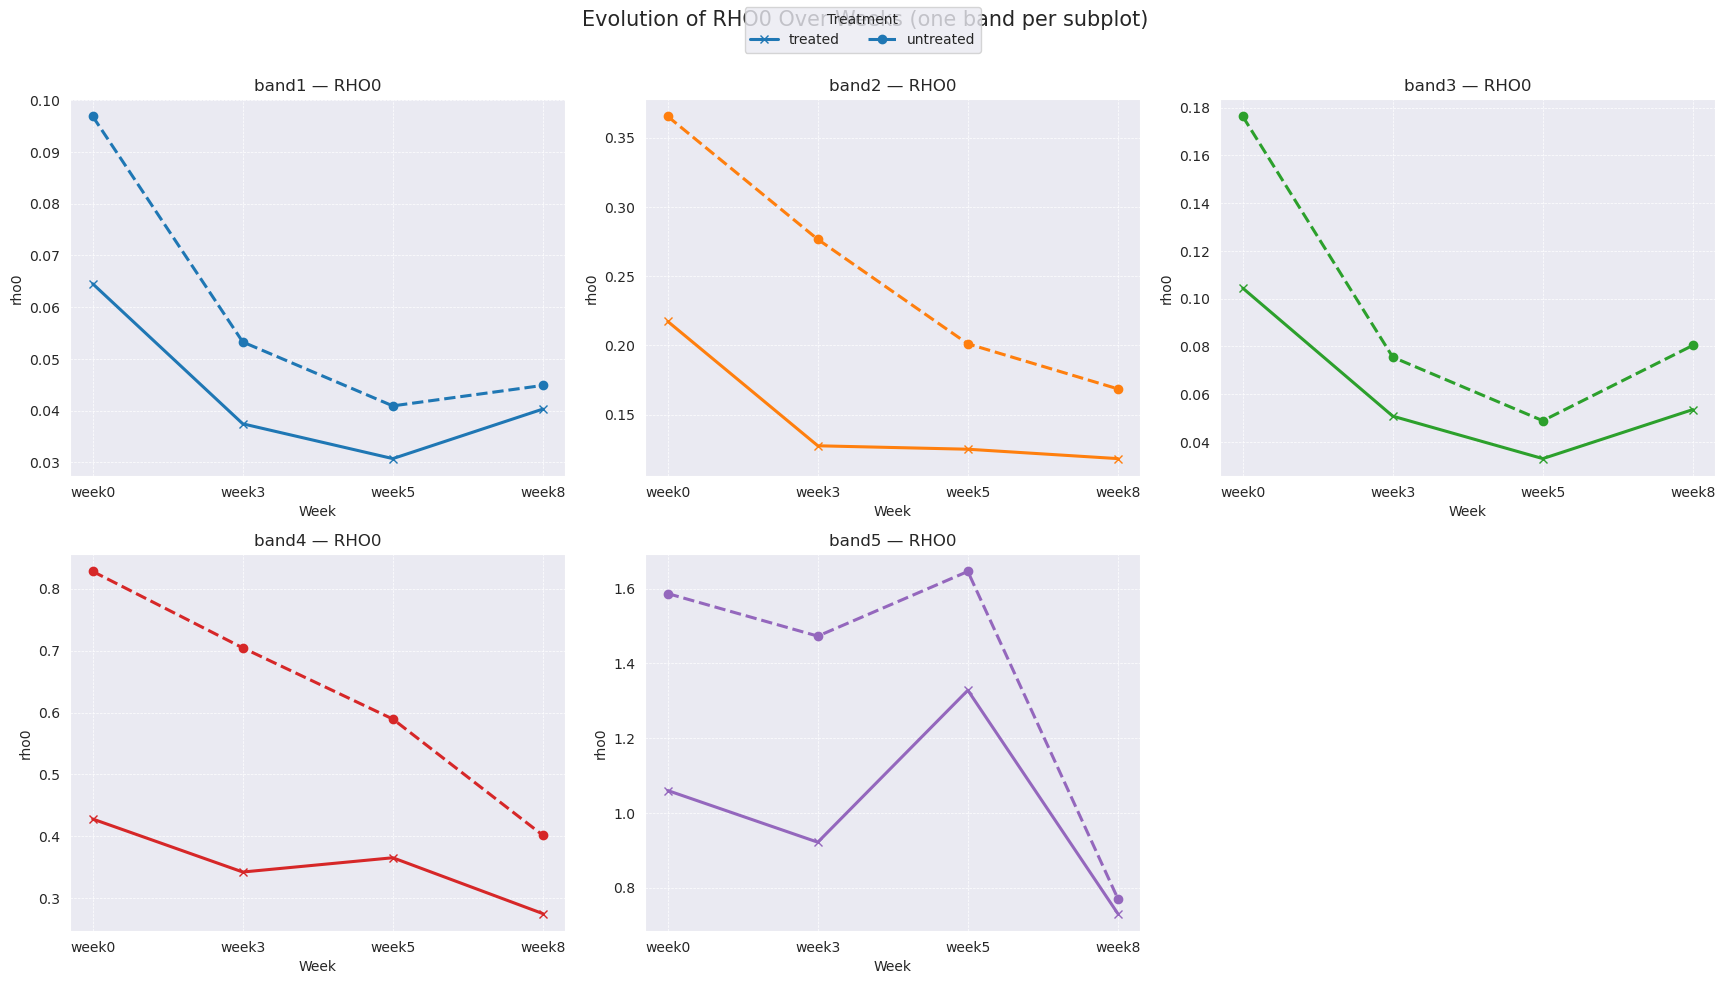

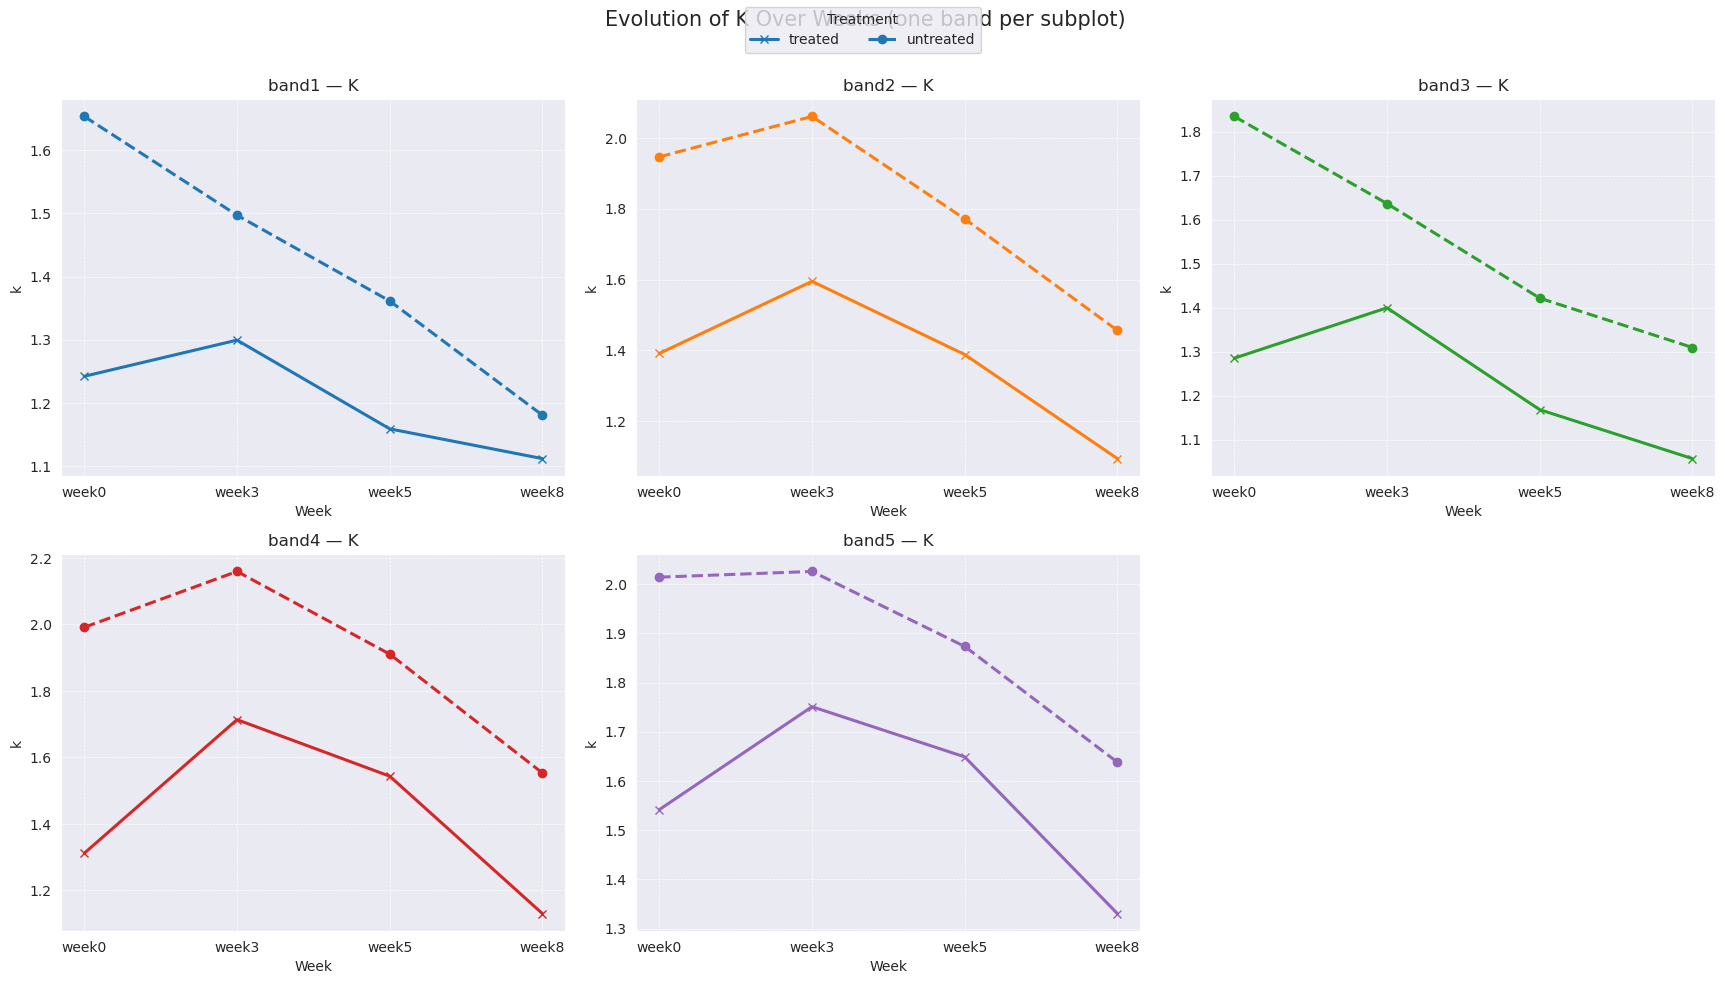

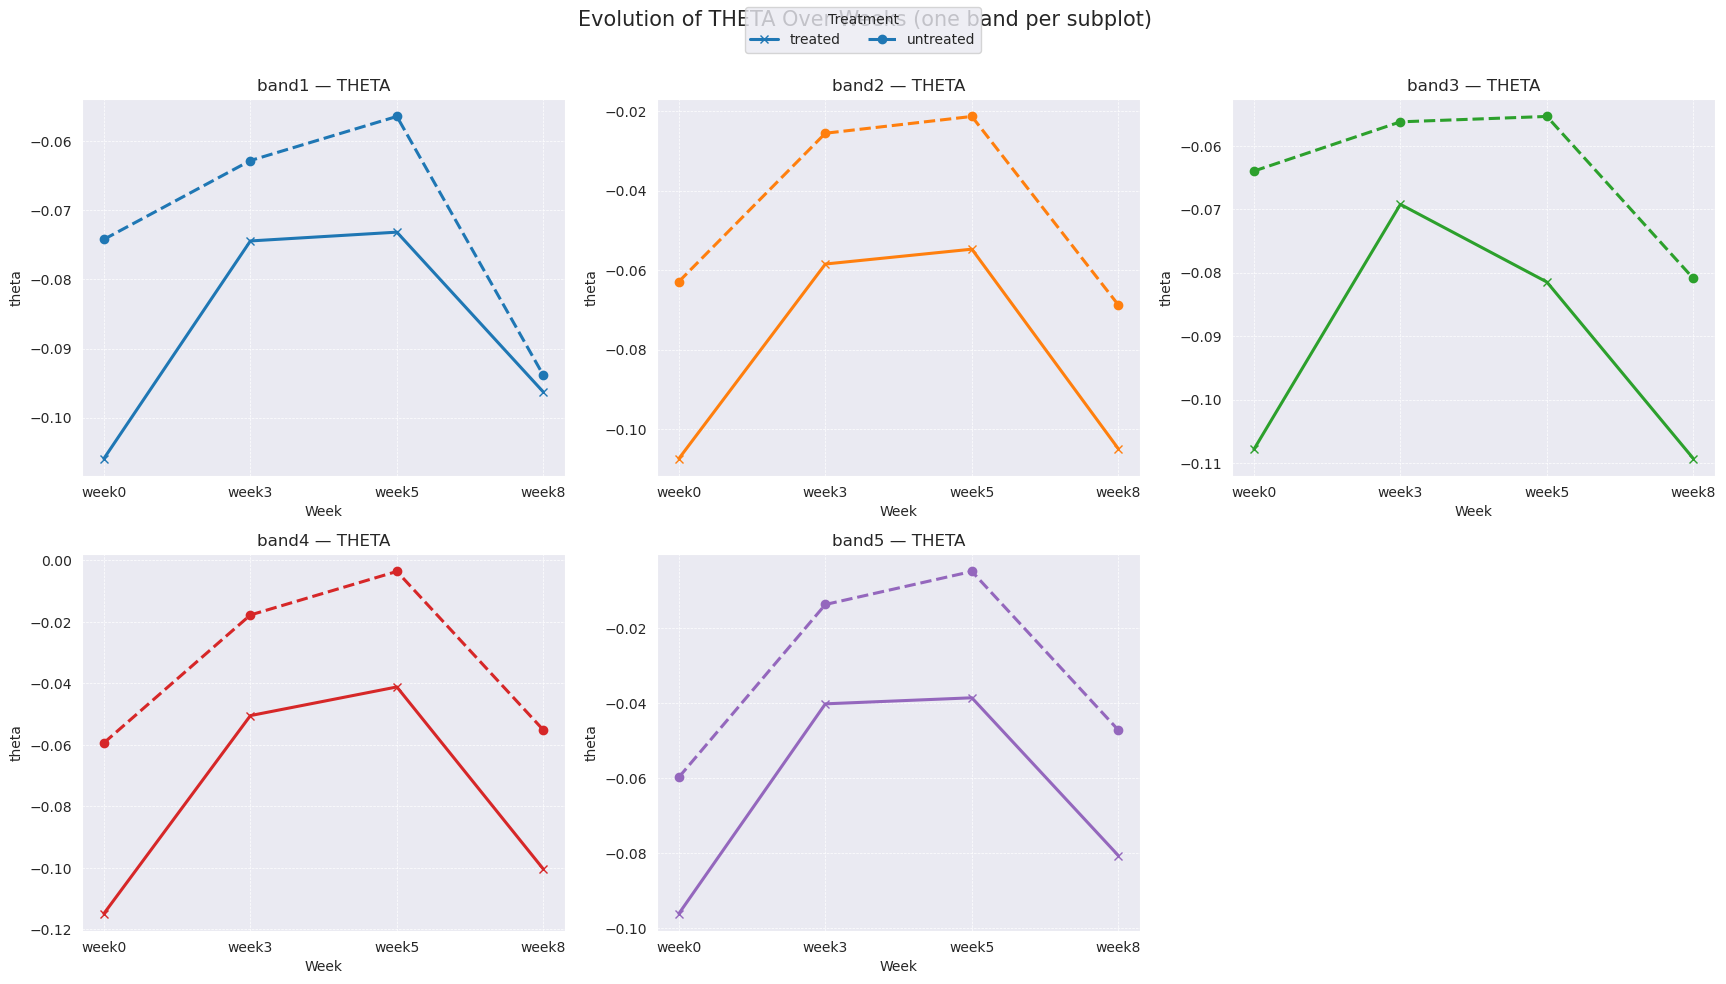

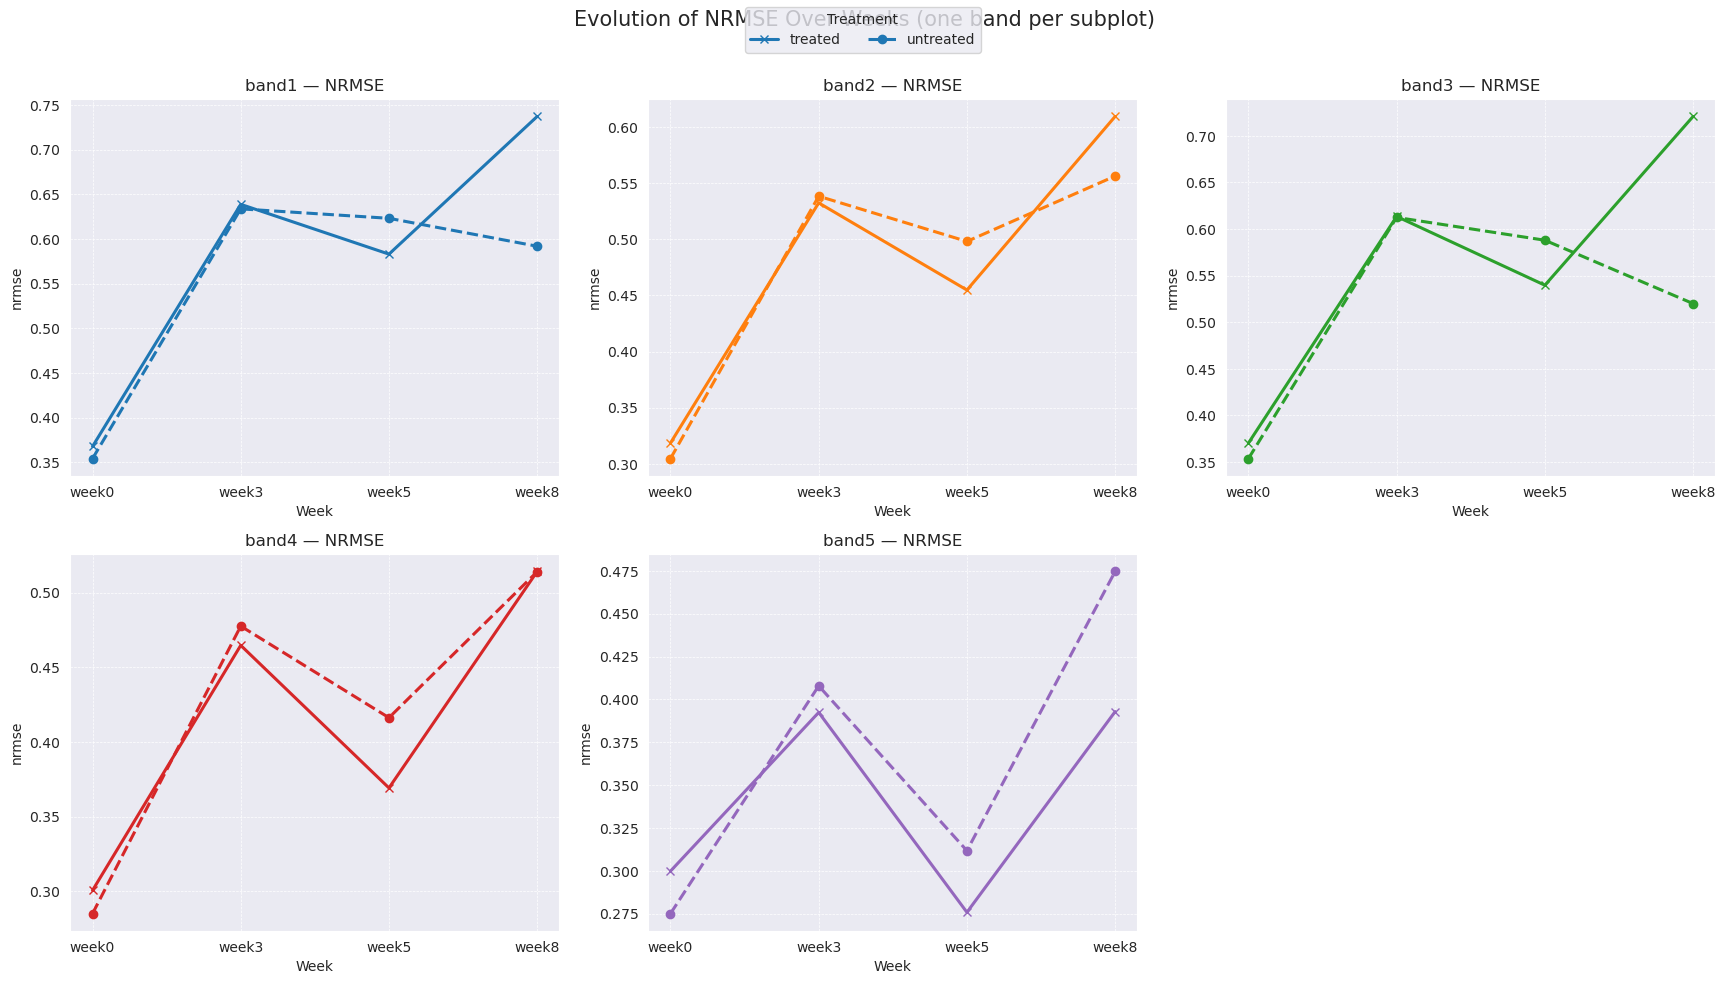

In [3]:
# --- 1. Visualization: Simplified Parameter Evolution Over Weeks (one band per subplot, fixed band colors) ---
print("Generating simplified parameter evolution plots (one band per subplot, fixed band colors)...")

# Bands and colors: one color per band, consistent across treatments
bands = list(grouped_avg['band'].unique())
n_bands = len(bands)
palette = sns.color_palette("tab10", n_bands)
band_colors = {b: palette[i] for i, b in enumerate(bands)}

def best_grid(n, max_cols=3):
    ncols = min(max_cols, n) if n > 0 else 1
    nrows = int(np.ceil(n / ncols))
    return nrows, ncols

# Line/marker styles per treatment (color comes from band_colors)
trt_styles = {
    1: dict(label="treated", linestyle='-', marker='x'),
    0: dict(label="untreated", linestyle='--', marker='o')
}

for param in parameters_to_plot:
    nrows, ncols = best_grid(n_bands, max_cols=3)
    # Bigger figure size
    fig, axes = plt.subplots(nrows, ncols, figsize=(5.8 * ncols, 4.8 * nrows), squeeze=False)
    axes_flat = axes.ravel()

    for i, band in enumerate(bands):
        ax = axes_flat[i]
        color = band_colors[band]

        for trt in [1, 0]:
            df_plot = grouped_avg[(grouped_avg['band'] == band) & (grouped_avg['treatment'] == trt)].copy()
            df_plot = df_plot.sort_values('week')

            ax.plot(
                df_plot['week'].astype(str),
                df_plot[param],
                color=color,
                linewidth=2.2,
                **trt_styles[trt]
            )

        ax.set_title(f"{band} — {param.upper()}", fontsize=12)
        ax.set_xlabel("Week", fontsize=10)
        ax.set_ylabel(f"{param}", fontsize=10)
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Hide any unused axes
    for j in range(i + 1, len(axes_flat)):
        axes_flat[j].set_visible(False)

    # Shared legend
    handles, labels = axes_flat[0].get_legend_handles_labels()
    fig.legend(handles, labels, title="Treatment", loc="upper center", ncol=2, frameon=True)

    fig.suptitle(f"Evolution of {param.upper()} Over Weeks (one band per subplot)", fontsize=15, y=1.02)
    fig.tight_layout()
    plt.show()


Generating dedicated plots for treatment effect analysis...


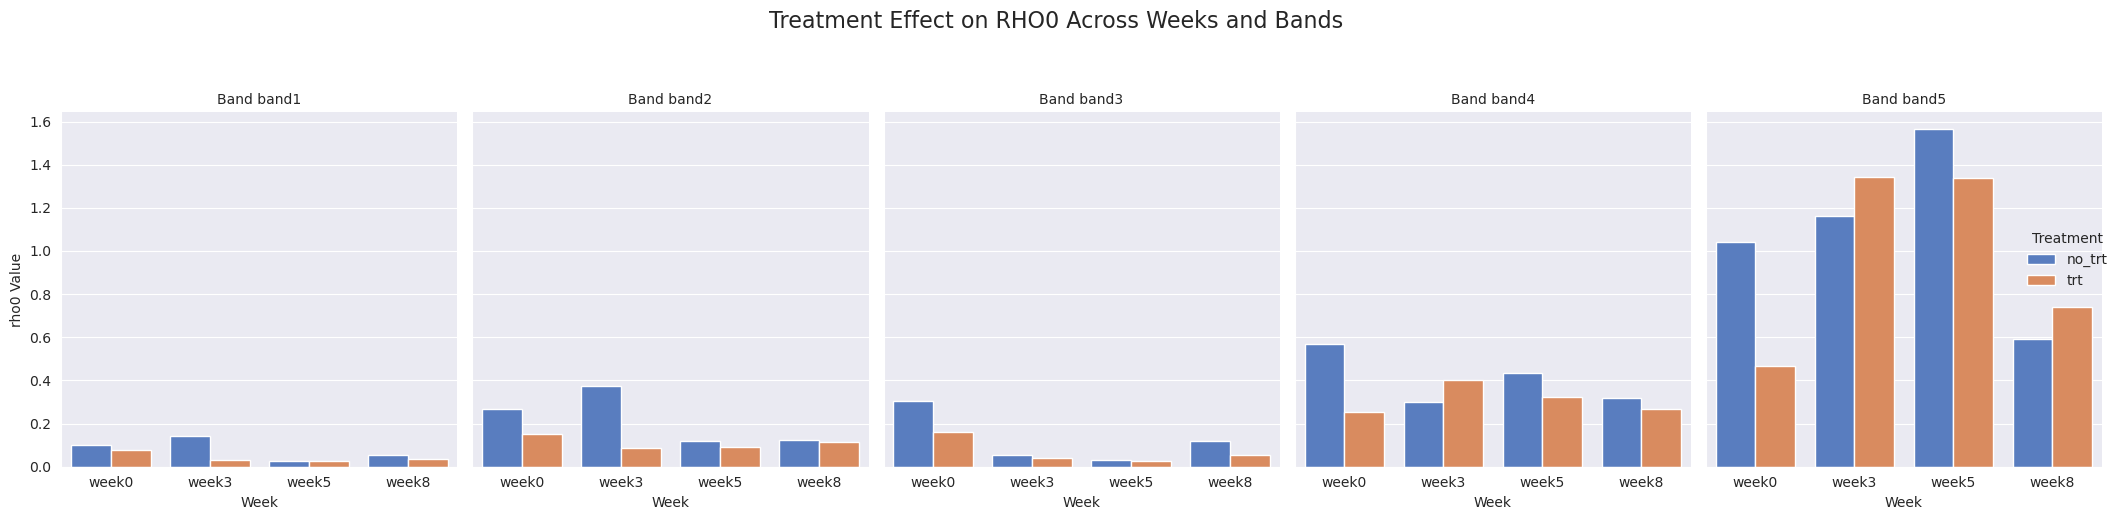

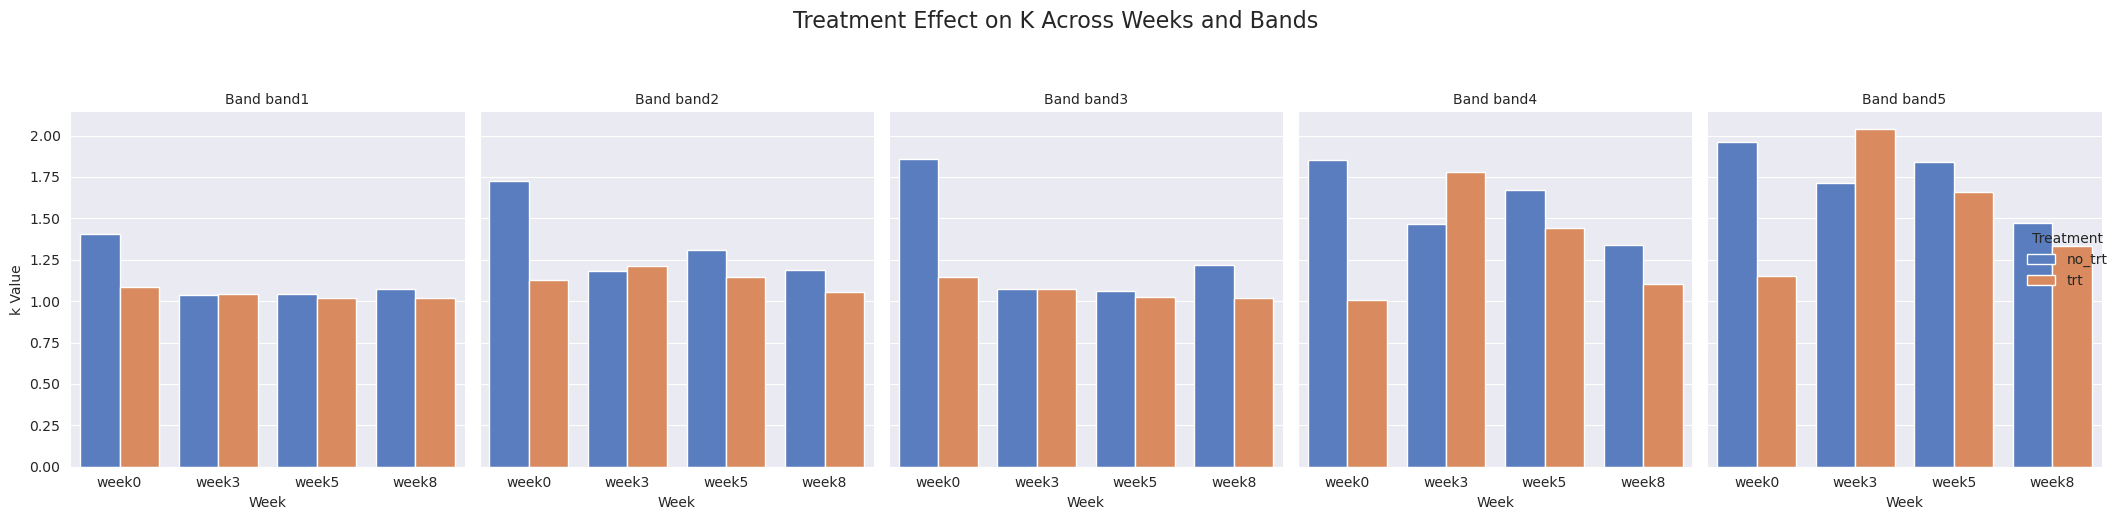

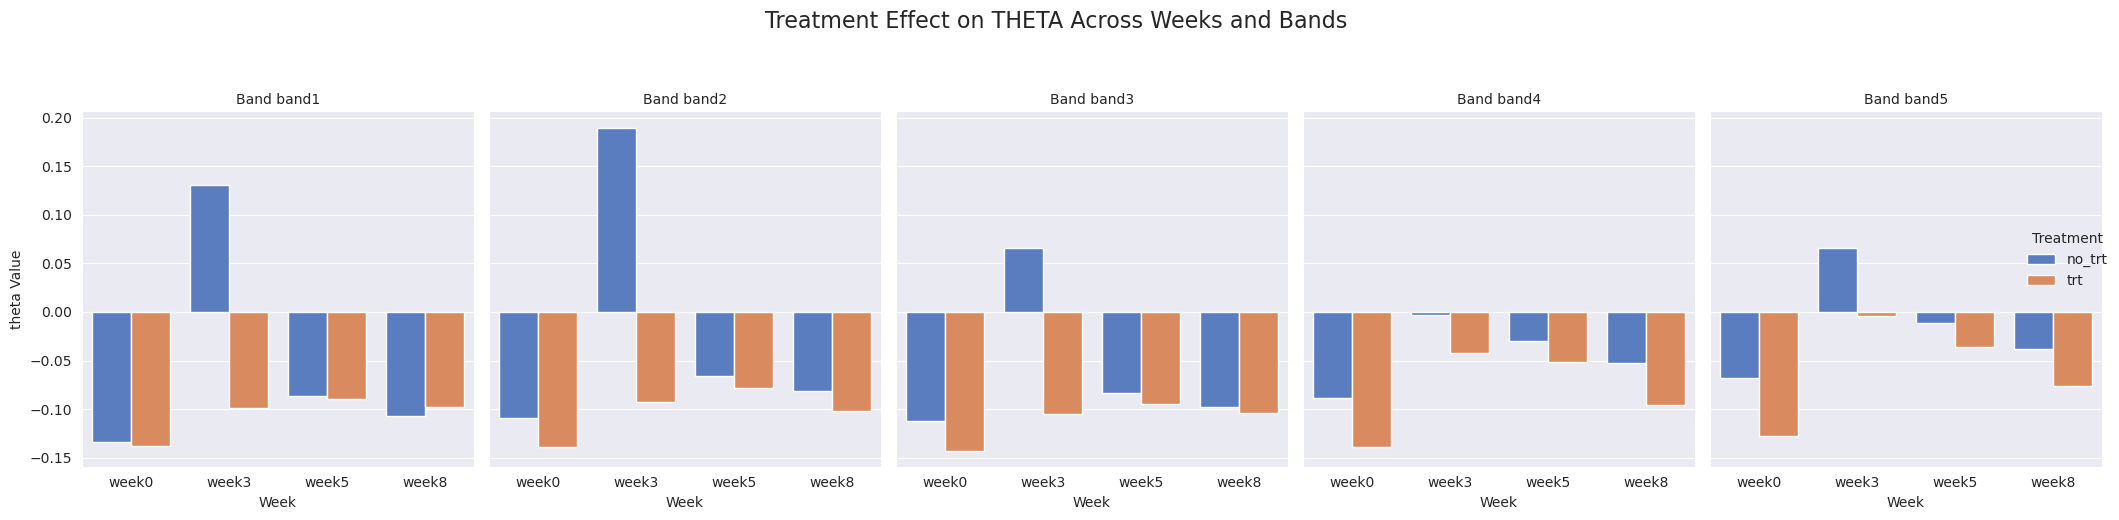

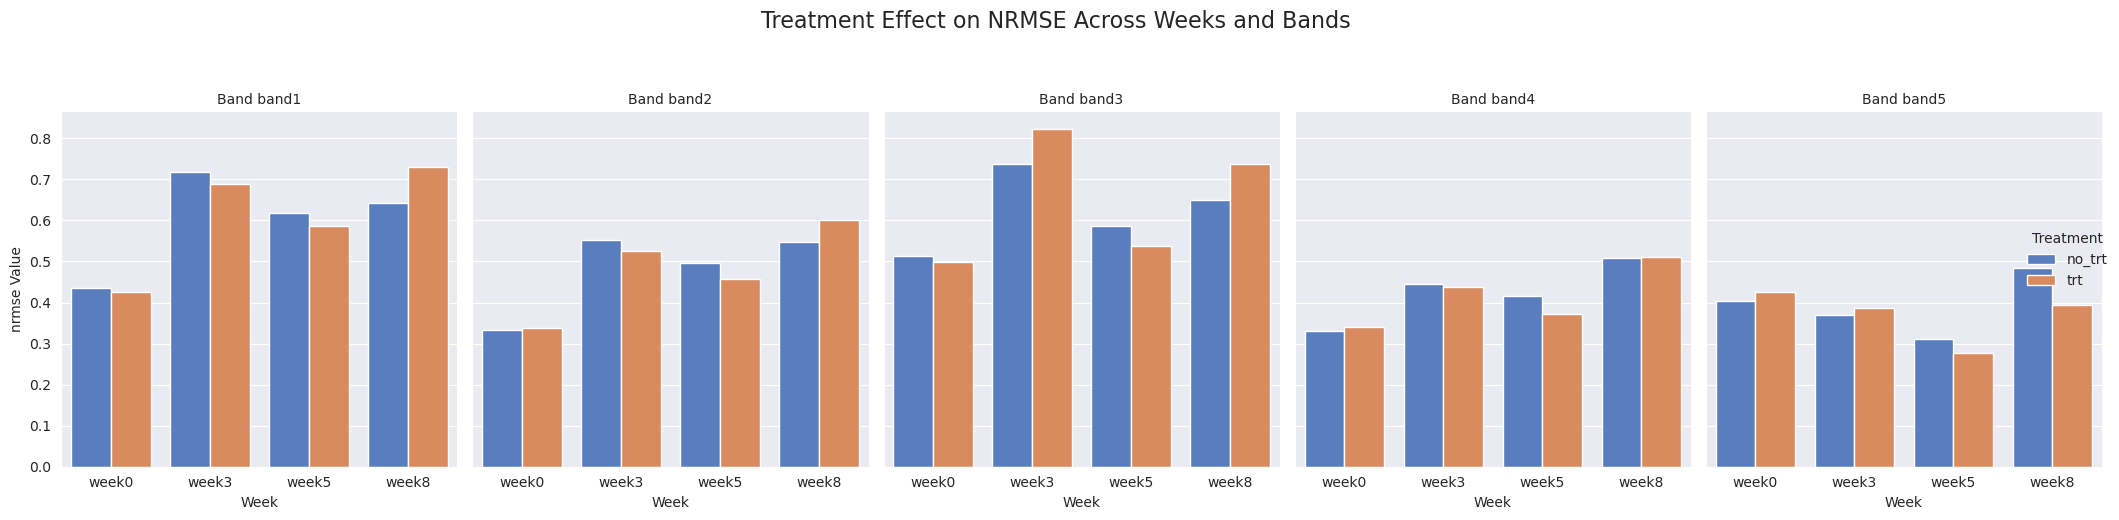

In [15]:
# --- 3. Visualization: Dedicated Treatment Effect Analysis ---
print("\nGenerating dedicated plots for treatment effect analysis...")
# Map treatment integers back to strings for clearer labels in the plot
grouped['treatment_label'] = grouped['treatment'].map({0: 'no_trt', 1: 'trt'})

for param in parameters_to_plot:
    g = sns.catplot(
        data=grouped,
        x='week',
        y=param,
        hue='treatment_label',
        col='band',
        kind='bar',
        palette='muted',
        height=5,
        aspect=0.8
    )
    g.fig.suptitle(f'Treatment Effect on {param.upper()} Across Weeks and Bands', y=1.03, fontsize=16)
    g.set_axis_labels("Week", f'{param} Value')
    g.set_titles("Band {col_name}")
    g.legend.set_title("Treatment")
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()



Generating correlation heatmap...


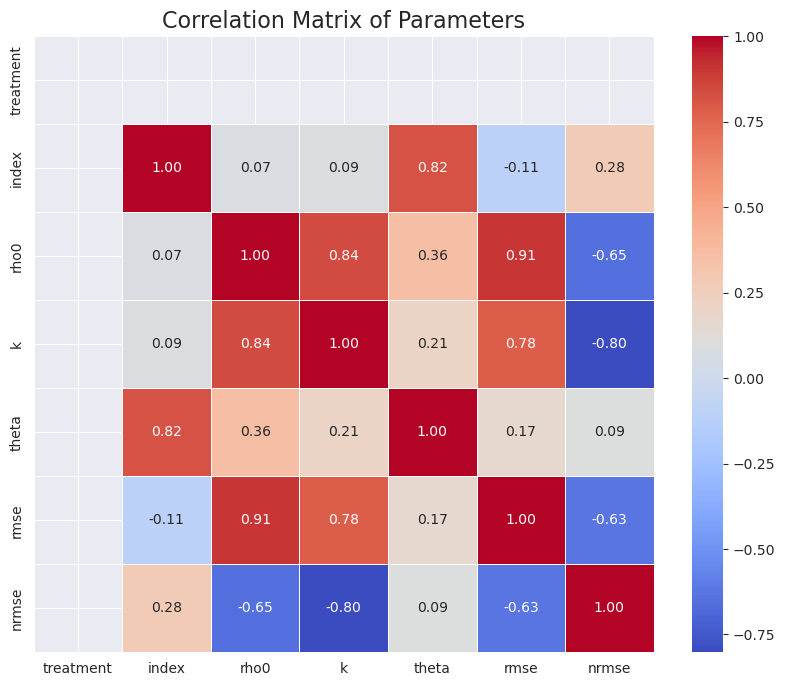

In [16]:
# --- 4. Visualization: Correlation Matrix of Parameters (Unchanged) ---
print("\nGenerating correlation heatmap...")
numeric_cols = grouped_avg.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Matrix of Parameters', fontsize=16)
plt.show()